In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error
from matplotlib import pyplot as plt
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import numpy as np
from scipy.stats import kurtosis

seed_value = 42

Breast cancer dataset

In [136]:
features_df = pd.read_csv('data/breast_cancer_data_features.csv')
labels = pd.read_csv('data/breast_cancer_data_targets.csv')

labels = labels.map(lambda x : 0 if x == 'B' else 1)

# Standardize
scaler = StandardScaler()
features_df = scaler.fit_transform(features_df)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, labels, test_size=0.2, random_state=seed_value)

labels.value_counts()

Diagnosis
0            357
1            212
Name: count, dtype: int64

In [90]:
print(f"Number of original features = {X_train.shape[1]}")

Number of original features = 30


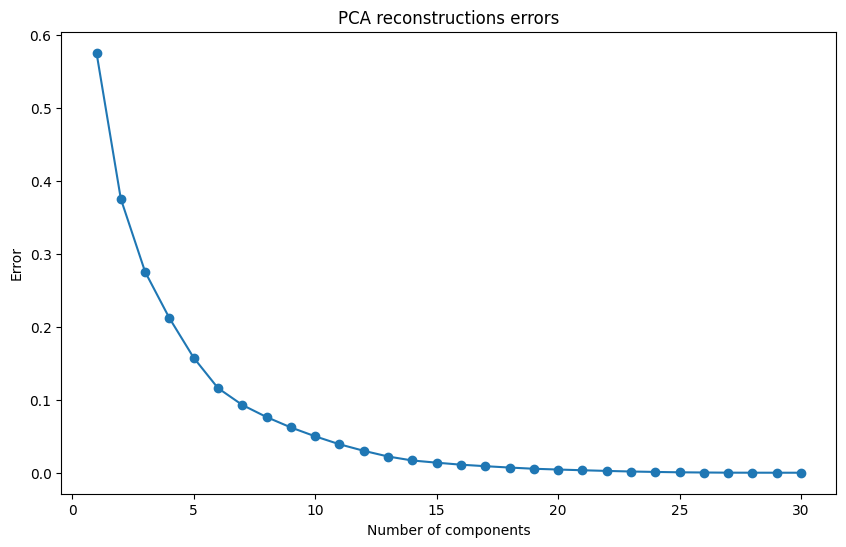

In [115]:
# Principal Component Analysis (PCA)
errors = []
for i in range(1,31):
    pca = PCA(n_components=i)
    data_pca = pca.fit_transform(X_train)

    data_pca_reconstructed = pca.inverse_transform(data_pca)

    reconstruction_error = mean_squared_error(X_train, data_pca_reconstructed)
    errors.append(reconstruction_error)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), errors, marker='o')
plt.title('PCA reconstructions errors')
plt.xlabel('Number of components')
plt.ylabel('Error')
plt.show()

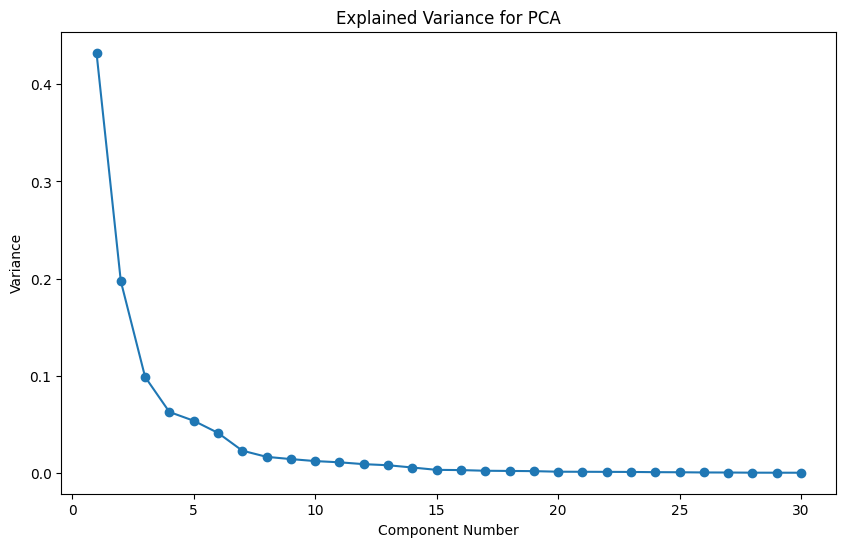

In [116]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance for PCA')
plt.xlabel('Component Number')
plt.ylabel('Variance')
plt.show()

In [93]:
np.sum(pca.explained_variance_ratio_[:15])

np.float64(0.9864192994486005)

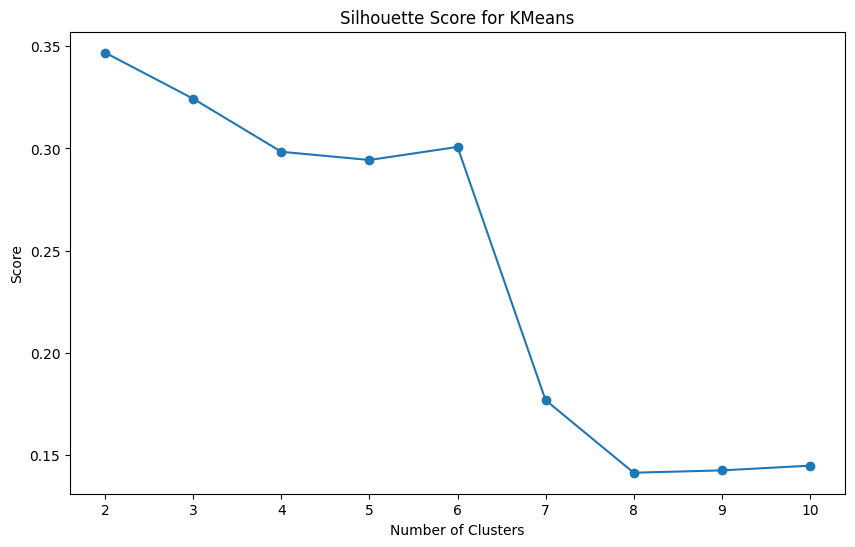

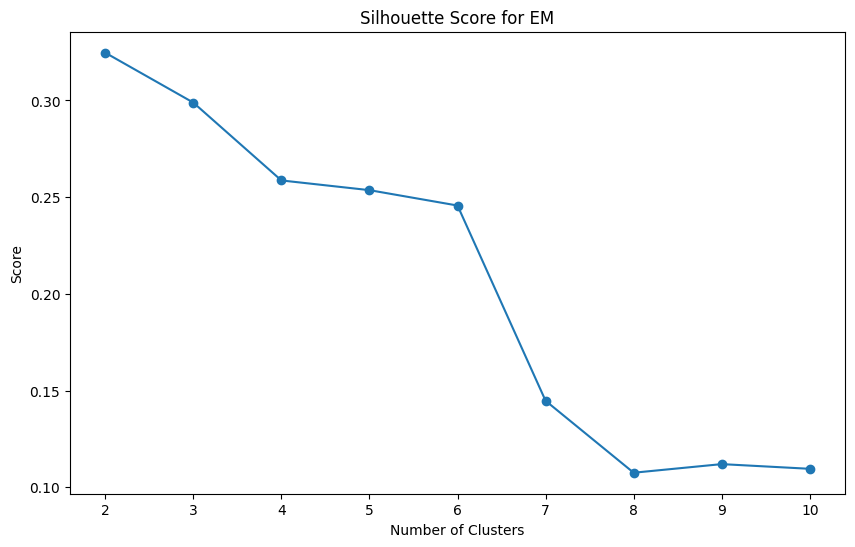

In [117]:
# Do EM and KMeans to reduced ones.
pca = PCA(n_components=15)
data_pca = pca.fit_transform(X_train)

# Checking silhouette score
scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(data_pca)
    scores.append(silhouette_score(data_pca, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), scores, marker='o')
plt.title('Silhouette Score for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

# Checking silhouette score for Gaussian
scores = []
for i in range(2, 11):
    gmm = GaussianMixture(n_components=i, random_state=42)
    cluster_labels = gmm.fit_predict(data_pca)
    scores.append(silhouette_score(data_pca, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), scores, marker='o')
plt.title('Silhouette Score for EM')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

c:\Users\aamir\miniconda3\envs\a3_ml\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
c:\Users\aamir\miniconda3\envs\a3_ml\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


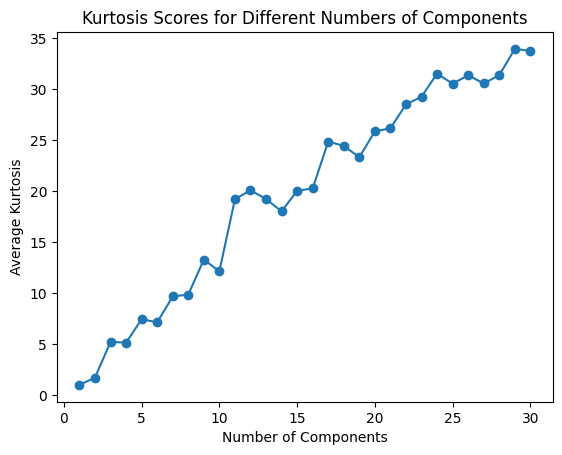

Optimal number of components: 29


In [119]:
# Function to compute total kurtosis for given number of components
def compute_kurtosis(data, n_components):
    ica = FastICA(n_components=n_components, random_state=42)
    components = ica.fit_transform(data)
    kurt = np.sum(np.abs(kurtosis(components)))
    return kurt

# Try different numbers of components and compute total kurtosis
n_components_range = range(1, 31)  # You can adjust this range based on your dataset
kurtosis_scores = [compute_kurtosis(X_train, n) for n in n_components_range]
kurtosis_scores_avg = [compute_kurtosis(X_train, n)/n for n in n_components_range]

# Plot the kurtosis scores
plt.plot(n_components_range, kurtosis_scores_avg, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Average Kurtosis')
plt.title('Kurtosis Scores for Different Numbers of Components')
plt.show()

# Find the number of components with the highest kurtosis
optimal_n_components = n_components_range[np.argmax(kurtosis_scores_avg)]
print(f'Optimal number of components: {optimal_n_components}')


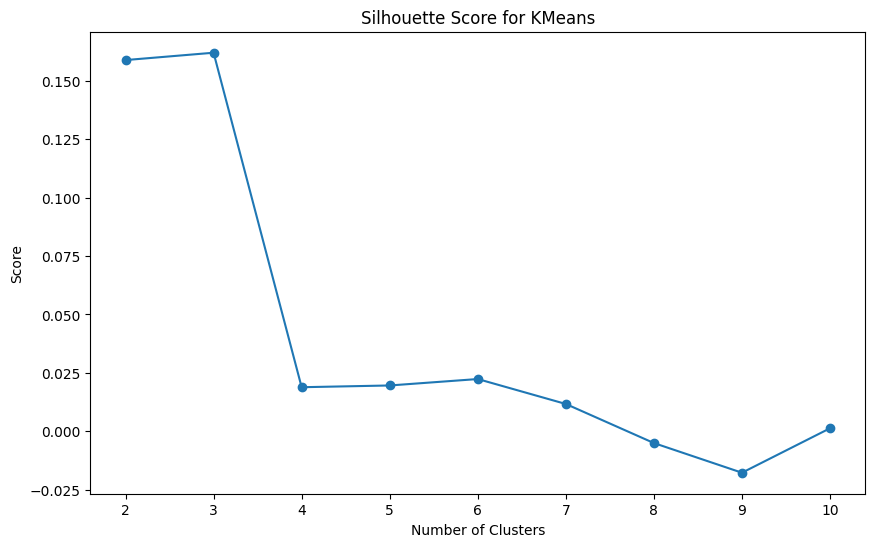

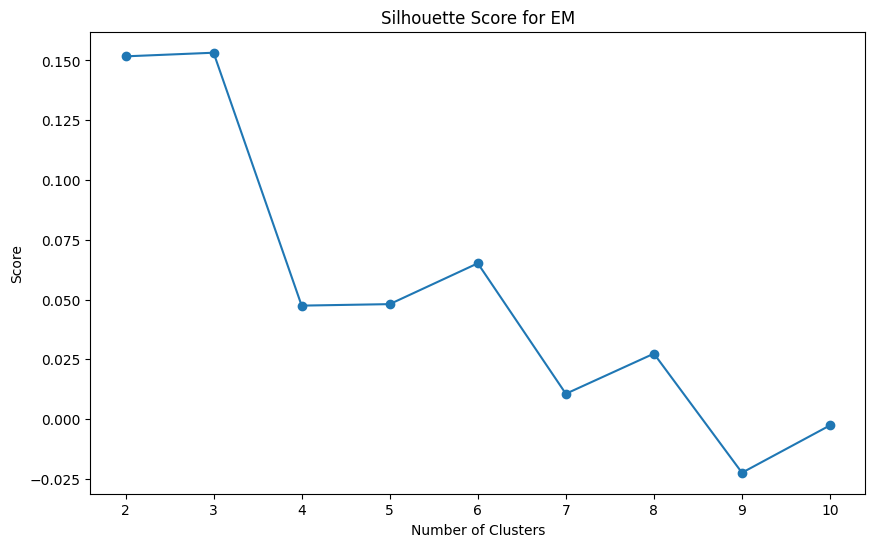

In [120]:
# Do EM and KMeans to reduced ones for ica
ica = FastICA(n_components=29)
data_ica = ica.fit_transform(X_train)

# Checking silhouette score
scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(data_ica)
    scores.append(silhouette_score(data_ica, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), scores, marker='o')
plt.title('Silhouette Score for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

# Checking silhouette score for Gaussian
scores = []
for i in range(2, 11):
    gmm = GaussianMixture(n_components=i, random_state=42)
    cluster_labels = gmm.fit_predict(data_ica)
    scores.append(silhouette_score(data_ica, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), scores, marker='o')
plt.title('Silhouette Score for EM')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

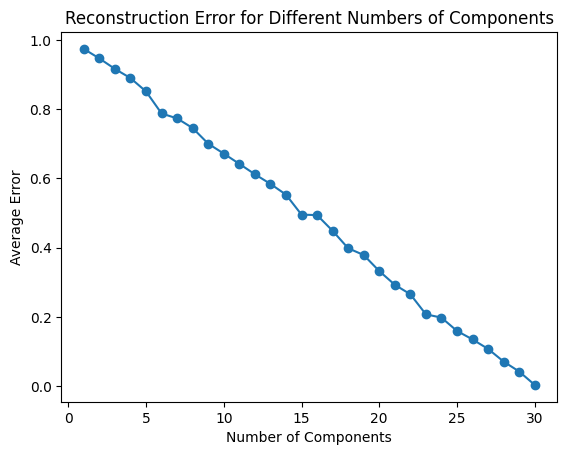

Optimal number of components: 30


In [122]:
# Function to compute total kurtosis for given number of components
def compute_reconstruction_error(data, n_components):
    seeds = range(40,60)
    mse_list = []
    for i in seeds:
        rp = SparseRandomProjection(n_components=n_components, random_state=i, compute_inverse_components=True)
        data_rp = rp.fit_transform(data)
        data_rp_reconstructed = rp.inverse_transform(data_rp)
        mse_list.append(mean_squared_error(data, data_rp_reconstructed))
    return np.average(mse_list)

# Try different numbers of components and compute total kurtosis
n_components_range = range(1, 31)  # You can adjust this range based on your dataset
error_scores = [compute_reconstruction_error(X_train, n) for n in n_components_range]
# kurtosis_scores_avg = [compute_kurtosis(X_train, n)/n for n in n_components_range]

# Plot the kurtosis scores
plt.plot(n_components_range, error_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Average Error')
plt.title('Reconstruction Error for Different Numbers of Components')
plt.show()

# Find the number of components with the highest kurtosis
optimal_n_components = n_components_range[np.argmin(error_scores)]
print(f'Optimal number of components: {optimal_n_components}')


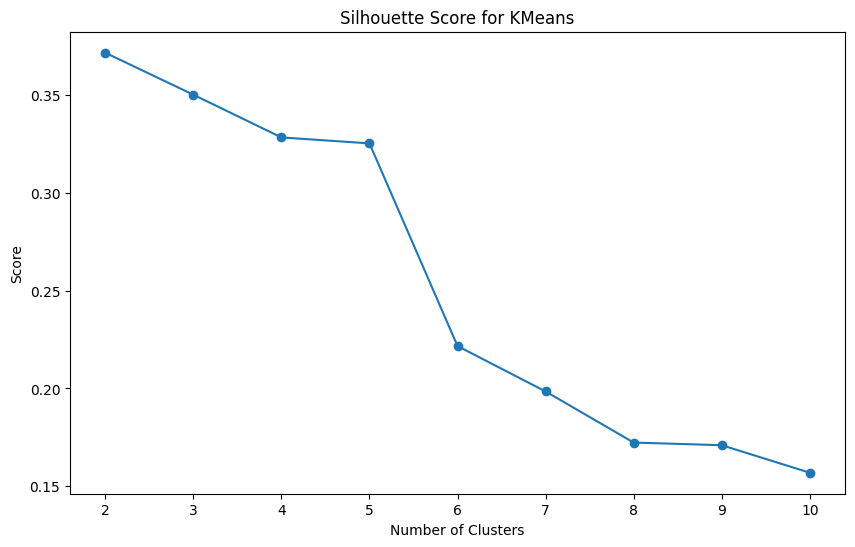

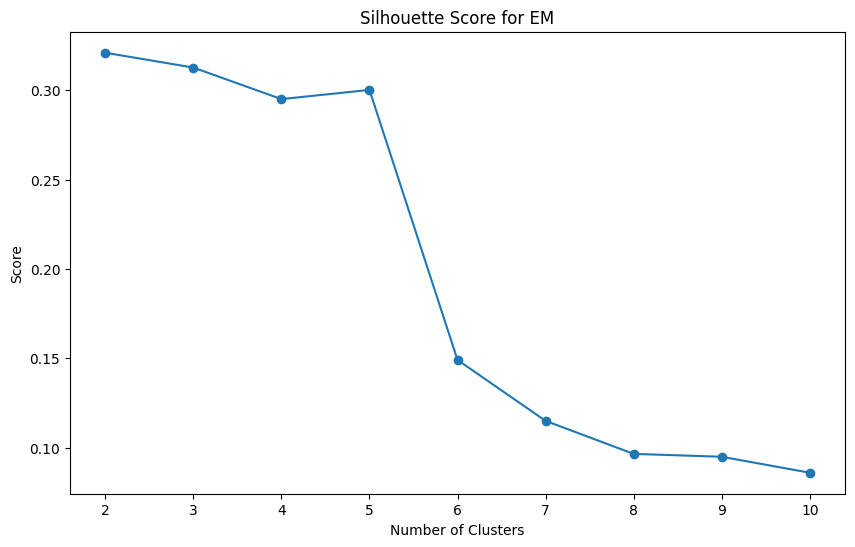

In [137]:
# Do EM and KMeans to reduced ones for rp
rp = SparseRandomProjection(n_components=15, random_state=42)
data_rp = rp.fit_transform(X_train)

# Checking silhouette score
scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(data_rp)
    scores.append(silhouette_score(data_rp, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), scores, marker='o')
plt.title('Silhouette Score for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

# Checking silhouette score for Gaussian
scores = []
for i in range(2, 11):
    gmm = GaussianMixture(n_components=i, random_state=42)
    cluster_labels = gmm.fit_predict(data_rp)
    scores.append(silhouette_score(data_rp, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), scores, marker='o')
plt.title('Silhouette Score for EM')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

Dataset 2

In [145]:
# Using adult data
# Some preprocessing steps
features_df = pd.read_csv('data/adult_data_features.csv')

# Replacing "?" with np.NaN
features_df = features_df.replace("?", np.nan)

# Dropping all rows with one or more null attributes
features_df = features_df.dropna()

# Dropping 'education' column since 'education-num' is the same column in numerical format
# Dropping 'fnlgwt' since don't know what it means
# features_df[['education', 'education-num']]
features_df = features_df.drop(['education', 'fnlwgt'], axis=1)

# Converting all categorical variables using one hot encoding
features_df = pd.get_dummies(features_df, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country', 'sex'], dtype='int')

# Changing dtype to float
features_df = features_df.astype('float')

# Get corresponding labels
labels = pd.read_csv('data/adult_data_targets.csv')
labels = labels.loc[features_df.index, :]

# Sanitizing the labels by replacing "<=50K." with "<=50K" and ">50K." with ">50K"
labels.replace({"<=50K.": "<=50K", ">50K.": ">50K"}, inplace=True)

# Change the labels to 0 and 1
labels = labels.map(lambda x : 1 if x == ">50K" else 0)

labels.value_counts()

# Standardize the data for all features except the categorical variables
scaler = StandardScaler()
features_df.loc[:,['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] = scaler.fit_transform(features_df.loc[:,['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])

X_train, X_test, y_train, y_test = train_test_split(features_df, labels, test_size=0.2, random_state=seed_value, stratify=labels)


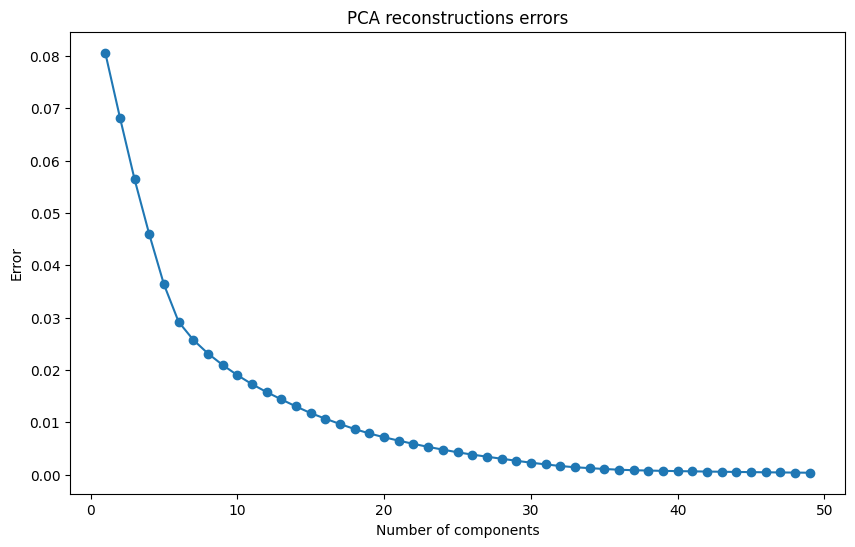

In [146]:
# Principal Component Analysis (PCA)
errors = []
for i in range(1,50):
    pca = PCA(n_components=i)
    data_pca = pca.fit_transform(X_train)

    data_pca_reconstructed = pca.inverse_transform(data_pca)

    reconstruction_error = mean_squared_error(X_train, data_pca_reconstructed)
    errors.append(reconstruction_error)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), errors, marker='o')
plt.title('PCA reconstructions errors')
plt.xlabel('Number of components')
plt.ylabel('Error')
plt.show()

Number of components = 49


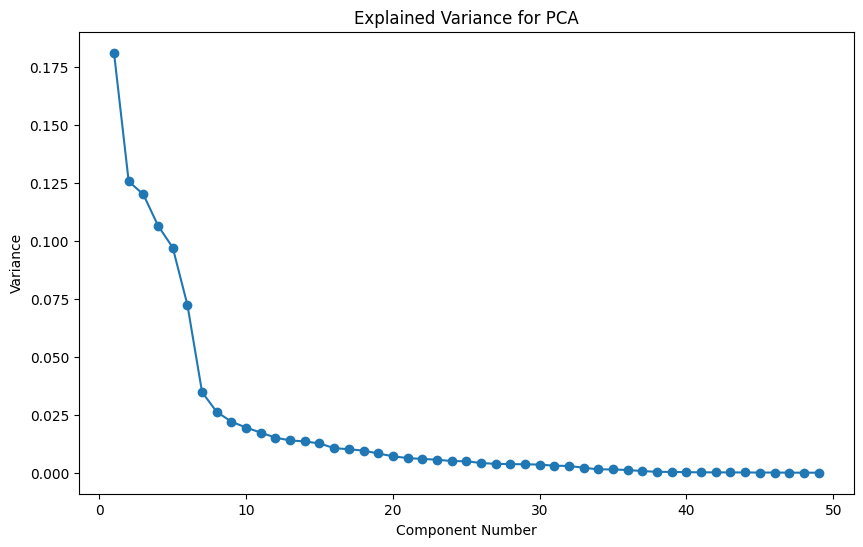

In [147]:
print(f"Number of components = {pca.n_components_}")
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance for PCA')
plt.xlabel('Component Number')
plt.ylabel('Variance')
plt.show()

In [151]:
np.sum(pca.explained_variance_ratio_[:25])

np.float64(0.9567212316867854)

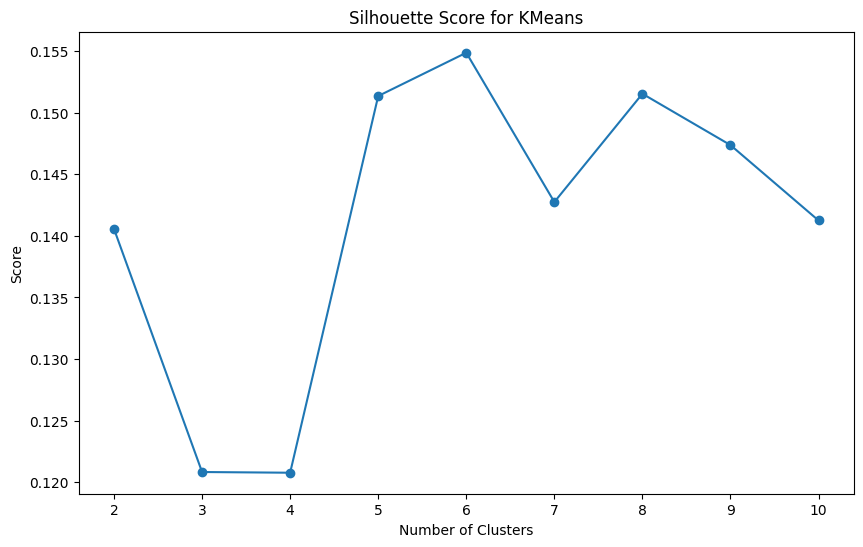

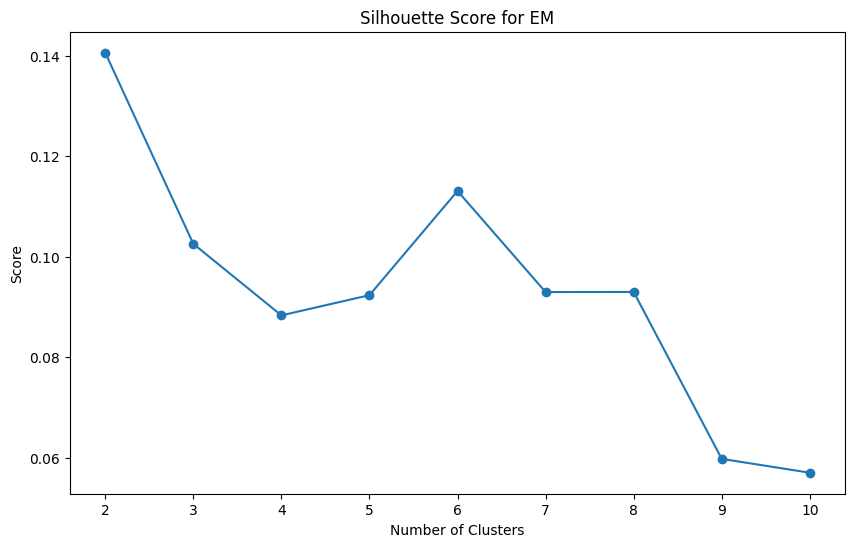

In [153]:
# Do EM and KMeans to reduced ones.
pca = PCA(n_components=25)
data_pca = pca.fit_transform(X_train)

# Checking silhouette score
scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(data_pca)
    scores.append(silhouette_score(data_pca, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), scores, marker='o')
plt.title('Silhouette Score for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

# Checking silhouette score for Gaussian
scores = []
for i in range(2, 11):
    gmm = GaussianMixture(n_components=i, random_state=42)
    cluster_labels = gmm.fit_predict(data_pca)
    scores.append(silhouette_score(data_pca, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), scores, marker='o')
plt.title('Silhouette Score for EM')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

c:\Users\aamir\miniconda3\envs\a3_ml\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
c:\Users\aamir\miniconda3\envs\a3_ml\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


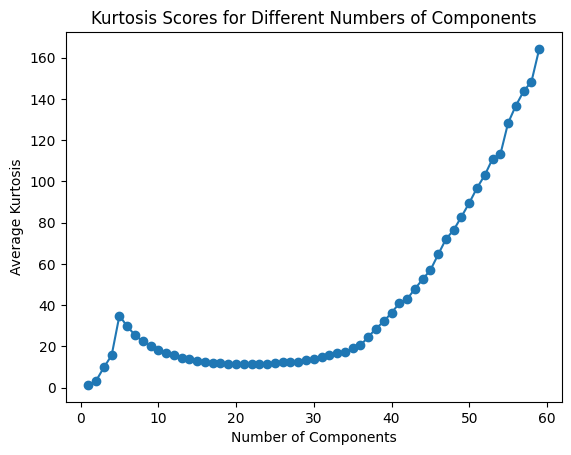

Optimal number of components: 59


In [154]:
# Function to compute total kurtosis for given number of components
def compute_kurtosis(data, n_components):
    ica = FastICA(n_components=n_components, random_state=42)
    components = ica.fit_transform(data)
    kurt = np.sum(np.abs(kurtosis(components)))
    return kurt

# Try different numbers of components and compute total kurtosis
n_components_range = range(1, 60)  # You can adjust this range based on your dataset
kurtosis_scores = [compute_kurtosis(X_train, n) for n in n_components_range]
kurtosis_scores_avg = [compute_kurtosis(X_train, n)/n for n in n_components_range]

# Plot the kurtosis scores
plt.plot(n_components_range, kurtosis_scores_avg, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Average Kurtosis')
plt.title('Kurtosis Scores for Different Numbers of Components')
plt.show()

# Find the number of components with the highest kurtosis
optimal_n_components = n_components_range[np.argmax(kurtosis_scores_avg)]
print(f'Optimal number of components: {optimal_n_components}')


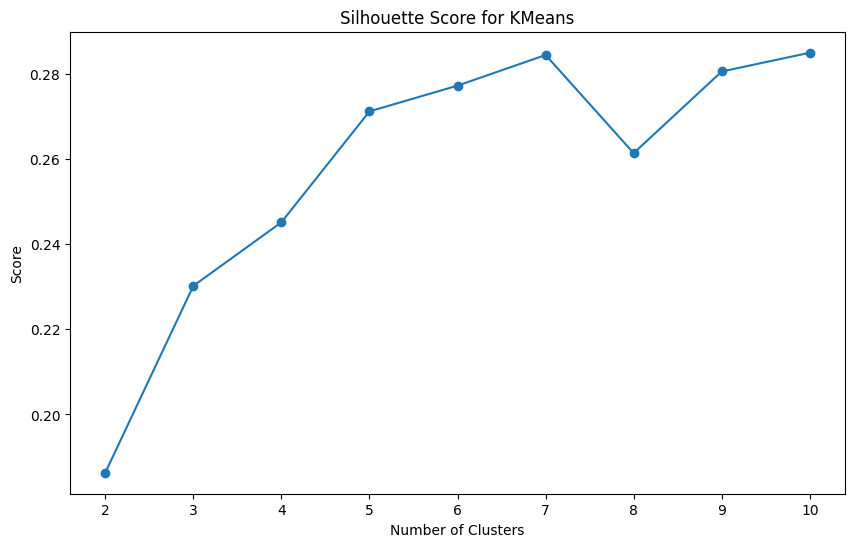

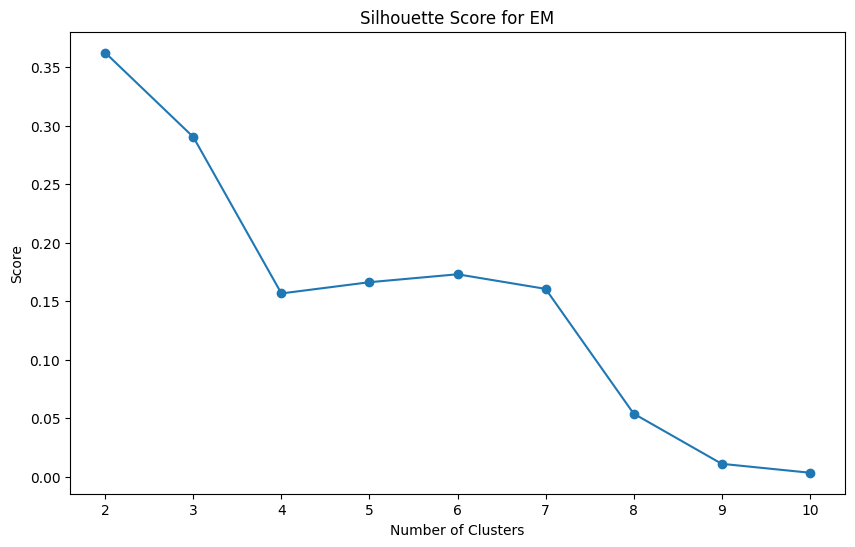

In [155]:
# Do EM and KMeans to reduced ones for ica
ica = FastICA(n_components=5)
data_ica = ica.fit_transform(X_train)

# Checking silhouette score
scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(data_ica)
    scores.append(silhouette_score(data_ica, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), scores, marker='o')
plt.title('Silhouette Score for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

# Checking silhouette score for Gaussian
scores = []
for i in range(2, 11):
    gmm = GaussianMixture(n_components=i, random_state=42)
    cluster_labels = gmm.fit_predict(data_ica)
    scores.append(silhouette_score(data_ica, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), scores, marker='o')
plt.title('Silhouette Score for EM')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

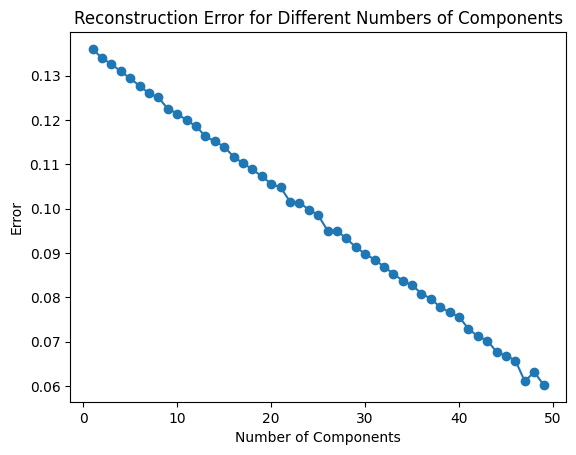

Optimal number of components: 49


In [156]:
# Function to compute total kurtosis for given number of components
def compute_reconstruction_error(data, n_components):
    seeds = range(40,60)
    mse_list = []
    for i in seeds:
        rp = SparseRandomProjection(n_components=n_components, random_state=i, compute_inverse_components=True)
        data_rp = rp.fit_transform(data)
        data_rp_reconstructed = rp.inverse_transform(data_rp)
        mse_list.append(mean_squared_error(data, data_rp_reconstructed))
    return np.average(mse_list)

# Try different numbers of components and compute total kurtosis
n_components_range = range(1, 50)  # You can adjust this range based on your dataset
error_scores = [compute_reconstruction_error(X_train, n) for n in n_components_range]
# kurtosis_scores_avg = [compute_kurtosis(X_train, n)/n for n in n_components_range]

# Plot the kurtosis scores
plt.plot(n_components_range, error_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Error')
plt.title('Reconstruction Error for Different Numbers of Components')
plt.show()

# Find the number of components with the highest kurtosis
optimal_n_components = n_components_range[np.argmin(error_scores)]
print(f'Optimal number of components: {optimal_n_components}')


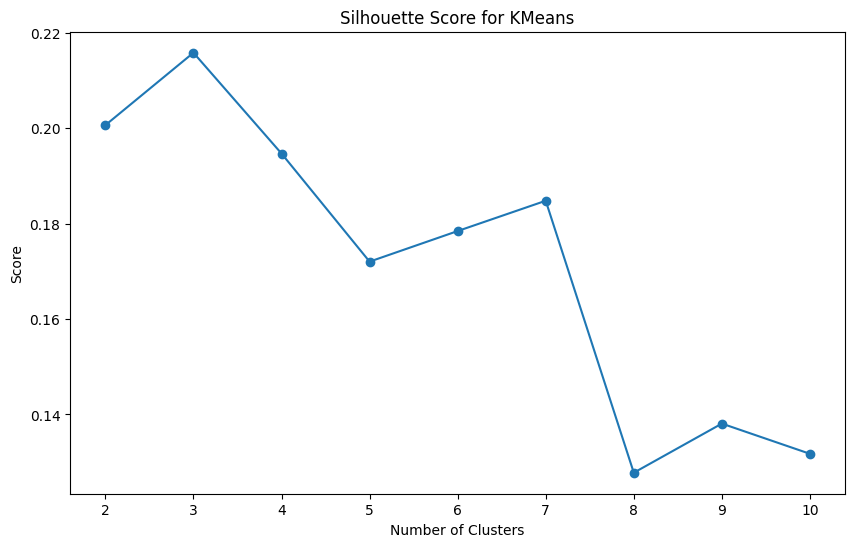

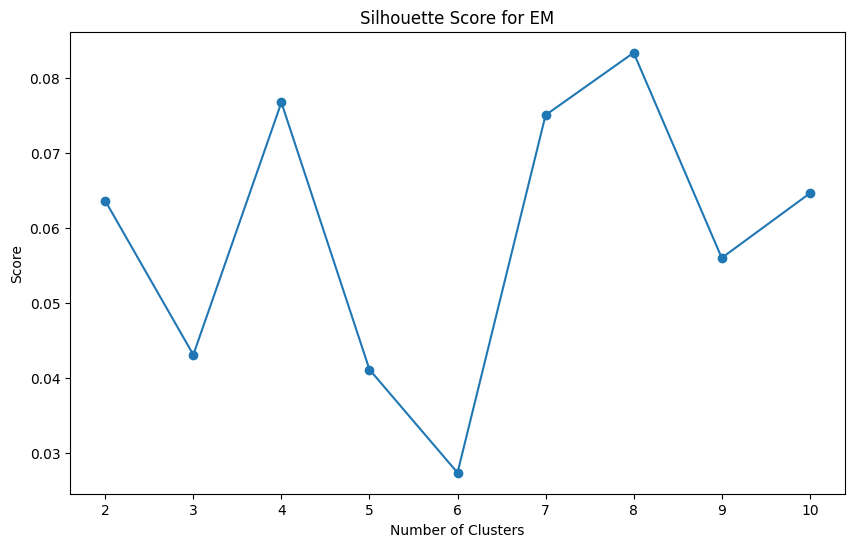

In [157]:
# Do EM and KMeans to reduced ones for rp
rp = SparseRandomProjection(n_components=30, random_state=42)
data_rp = rp.fit_transform(X_train)

# Checking silhouette score
scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(data_rp)
    scores.append(silhouette_score(data_rp, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), scores, marker='o')
plt.title('Silhouette Score for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

# Checking silhouette score for Gaussian
scores = []
for i in range(2, 11):
    gmm = GaussianMixture(n_components=i, random_state=42)
    cluster_labels = gmm.fit_predict(data_rp)
    scores.append(silhouette_score(data_rp, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), scores, marker='o')
plt.title('Silhouette Score for EM')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()